In [67]:
### Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

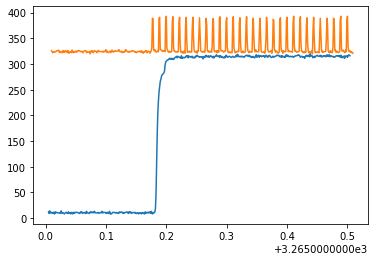

In [68]:
### Load corr streams and plot
headset_stream = pd.read_csv('Data230327/headset-stream.csv')
headset_stream = headset_stream.rename(columns={headset_stream.columns[0]: "Time", headset_stream.columns[1]: "Value"})
screen_stream = pd.read_csv('Data230327/screen-stream.csv')
screen_stream = screen_stream.rename(columns={screen_stream.columns[0]: "Time", screen_stream.columns[1]: "Value"})

plt_range = (0, 500)
plt.figure()
plt.plot(screen_stream["Time"][plt_range[0]:plt_range[1]], screen_stream["Value"][plt_range[0]:plt_range[1]])
plt.plot(headset_stream["Time"][plt_range[0]:plt_range[1]], headset_stream["Value"][plt_range[0]:plt_range[1]] + 50)

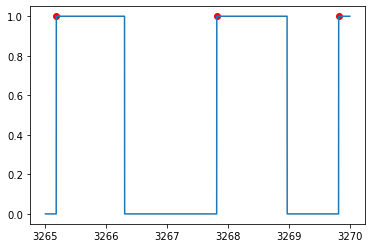

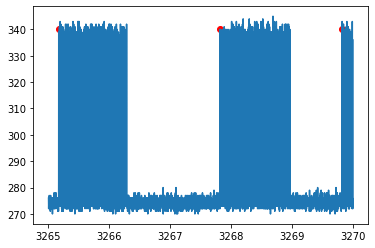

In [99]:
### Extract ON times for each stream

screen_signal = np.array(screen_stream["Value"])
screen_time = np.array(screen_stream["Time"])
headset_signal = np.array(headset_stream["Value"])
headset_time = np.array(headset_stream["Time"])

# Binarise screen signal and find peaks
screen_signal[screen_signal < 25] = 0
screen_signal[screen_signal > 0] = 1
screen_on, props = find_peaks(np.diff(screen_signal))
screen_on_times = screen_time[screen_on]

# Preview
prev_window = (0, 3270)
plt.figure()
plt.plot(screen_time[screen_time < prev_window[1]], screen_signal[screen_time < prev_window[1]])
plt.scatter(screen_on_times[screen_on_times < prev_window[1]], np.ones((1, len(screen_on_times[screen_on_times < prev_window[1]]))), c='r')

# Get corresponding ON pulse for headset
headset_on_times = []
for t in screen_on_times:
    headset_window = headset_signal[(headset_time > (t - 0.1)) & (headset_time < (t + 0.1))]
    headset_window_time = headset_time[(headset_time > (t - 0.1)) & (headset_time < (t + 0.1))]

    onset = np.where(headset_window > 285)[0][0]
    onset_time = headset_window_time[onset]
    headset_on_times.append(onset_time)

headset_on_times = np.array(headset_on_times)

# Preview
plt.figure()
plt.plot(headset_time[headset_time < prev_window[1]], headset_signal[headset_time < prev_window[1]])
plt.scatter(headset_on_times[headset_on_times < prev_window[1]], np.ones((1, len(headset_on_times[headset_on_times < prev_window[1]]))) * 340, c='r')

(array([ 5.,  8., 13., 12., 24., 14., 10., 12., 11.,  6.]),
 array([-0.005984 , -0.0034816, -0.0009792,  0.0015232,  0.0040256,
         0.006528 ,  0.0090304,  0.0115328,  0.0140352,  0.0165376,
         0.01904  ]),
 <BarContainer object of 10 artists>)

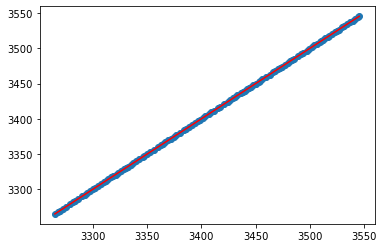

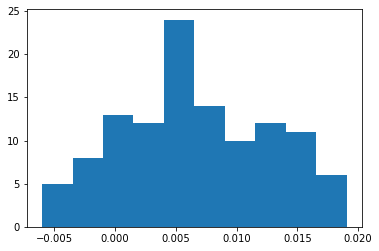

In [106]:
# Correlate, compare
plt.figure()
plt.scatter(screen_on_times, headset_on_times)
plt.plot(screen_on_times, screen_on_times, c='r')

time_diff = screen_on_times - headset_on_times
plt.figure()
plt.hist(time_diff)